#Student Name: Fergus Mc Hale
#Student ID: 18203485

Purpose
The purpose of this E-tivity is to introduce the basics of probability theory.

Task (Complete by Saturday Week 6)
Describe a simple problem that contains a chance element. 
Use a continuous random variable or a discrete random variable.
Use a normal distribution or a uniform distribution.

Write Python code to simulate an experiment with your problem. The simulation can include a simulated action (e.g. rolling dice) or a simulated observation (e.g. observing rain or sunshine). The code should run the experiment a sufficient number of times such that you can calculate/approximate the following:

The expected value of your random variable.
The standard deviation of your random variable.
Additionally you should be able to:

Plot the distribution found in your simulated experiment
 
 N.B.:

Use the Jupyter Notebook provided in the repository for week 6.
You do not need to encapsulate your code in functions or methods.
Structure your notebook as follows:
Markdown cell with problem description
Cell(s) with experiment
Cell(s) with outputs and graphs
You may only use the following modules:
Random
Numpy
Matplotlib
You are not required to perform exception handling.
You are not required to provide tests for your code.
HINTS:

You can use matplotlib to plot a histogram of a list of samples as follows:
num_bins = 21
plt.hist(samples, num_bins, facecolor='blue')
plt.show()

GIT push your implementation and post the description of your problem to E-tivity 6: Probability Theory.

Include calculated values of points 1 and 2 above.
Provide a link to your branch.
Respond (Complete by Wednesday Week 7)
Respond to one of your peers with:

A respectful and in-depth analysis of their approach.
Suggestions for improvements or alternative solutions for the code.
Reflect (Complete by Saturday Week 7)
Use the feedback provided to you, and any other insights you have gained since writing the original code to improve the code you wrote in this E-tivity. GIT push the result to your remote branch.

What is the probability of selecting a particular card from a 52 card deck?
1-12: clubs (from ace to king)
13-24: hearts (from ace to king)
25-36: spades (from ace to king)
37-52: diamonds (from ace to king)

In [6]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt

In [8]:
N_ITERATIONS = 1000
clubs = [range(1, 12)]
hearts = [range(13, 24)]
spades = [range(25, 36)]
diamonds = [range(37, 52)]

sample_space = []

def pick_card():
    return rand.randint(1,52)

def simulate(n):
    for i in range(n):
        sample_space.append(pick_card())
    return sample_space

sample_iterations = simulate(N_ITERATIONS)
print(sample_iterations)

[47, 33, 47, 14, 31, 11, 38, 39, 3, 8, 7, 35, 45, 36, 28, 5, 44, 22, 2, 10, 24, 40, 30, 5, 39, 13, 13, 6, 43, 34, 24, 45, 32, 17, 24, 36, 29, 32, 39, 35, 43, 16, 1, 37, 31, 17, 5, 49, 41, 43, 50, 36, 44, 1, 27, 44, 48, 19, 26, 40, 27, 39, 44, 28, 42, 24, 40, 9, 11, 15, 4, 28, 10, 42, 25, 11, 15, 9, 8, 10, 35, 23, 11, 26, 12, 52, 29, 48, 32, 8, 3, 30, 31, 42, 10, 11, 29, 48, 3, 2, 10, 28, 40, 15, 6, 51, 30, 35, 18, 8, 28, 37, 21, 22, 4, 41, 41, 30, 32, 3, 1, 51, 6, 7, 41, 10, 50, 27, 48, 6, 6, 48, 51, 18, 18, 39, 6, 23, 27, 9, 18, 30, 30, 27, 47, 34, 2, 25, 8, 5, 22, 45, 37, 48, 49, 36, 47, 50, 18, 15, 2, 7, 13, 52, 10, 16, 48, 13, 23, 52, 41, 22, 3, 23, 28, 2, 19, 48, 25, 37, 13, 45, 43, 47, 26, 18, 6, 29, 22, 31, 13, 38, 36, 16, 8, 27, 6, 13, 29, 16, 38, 3, 50, 52, 1, 27, 5, 10, 11, 31, 7, 41, 19, 17, 38, 32, 20, 13, 28, 47, 18, 9, 44, 49, 9, 32, 11, 3, 36, 14, 35, 27, 10, 33, 45, 23, 7, 47, 2, 1, 29, 1, 4, 2, 32, 43, 21, 31, 30, 50, 25, 32, 5, 39, 49, 4, 12, 19, 34, 32, 24, 14, 49, 2

In [9]:
print ("Sample Mean: {}".format(np.mean(sample_space)))
print ("Sample Standard Deviation: {}".format(np.std(sample_space)))

Sample Mean: 26.159
Sample Standard Deviation: 15.440910562528364


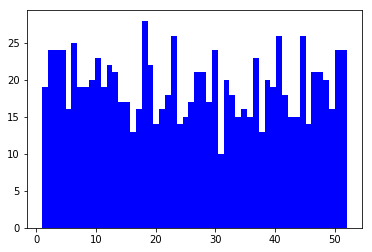

In [10]:
num_bins = 52
plt.hist(sample_iterations, num_bins, facecolor='blue')
plt.show()